# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [28]:
dataset_train = pd.read_csv(r'/content/google_train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[14.13013 ],
       [14.26977 ],
       [14.446196],
       ...,
       [94.489998],
       [95.370003],
       [94.849998]])

### Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [30]:
training_set_scaled

array([[0.01627303],
       [0.01727484],
       [0.01854056],
       ...,
       [0.59279173],
       [0.59910508],
       [0.59537445]])

### Creating a data structure with 60 timesteps and 1 output

In [31]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [34]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [35]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [36]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [37]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [38]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [39]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [40]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [41]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 16s 157ms/step - loss: 0.0014
Epoch 2/100
38/38 [==============================] - 5s 128ms/step - loss: 2.1278e-04
Epoch 3/100
38/38 [==============================] - 11s 283ms/step - loss: 1.7495e-04
Epoch 4/100
38/38 [==============================] - 5s 126ms/step - loss: 1.7146e-04
Epoch 5/100
38/38 [==============================] - 6s 157ms/step - loss: 2.0089e-04
Epoch 6/100
38/38 [==============================] - 5s 125ms/step - loss: 1.5854e-04
Epoch 7/100
38/38 [==============================] - 5s 127ms/step - loss: 1.3700e-04
Epoch 8/100
38/38 [==============================] - 6s 155ms/step - loss: 1.5631e-04
Epoch 9/100
38/38 [==============================] - 5s 126ms/step - loss: 1.3854e-04
Epoch 10/100
38/38 [==============================] - 6s 158ms/step - loss: 1.1485e-04
Epoch 11/100
38/38 [==============================] - 5s 127ms/step - loss: 1.1128e-04
Epoch 12/100
38/38 [==============================] - 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [43]:
dataset_test = pd.read_csv(r'/content/google_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [50]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 70ms/step


### Visualising the results

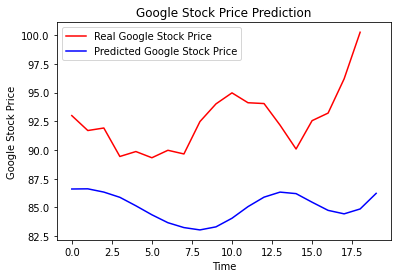

In [51]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()